# ELLS - Practical Introduction into Programming with Python

<a href="https://pef.czu.cz/en/"><img src="https://aleksejalex.4fan.cz/ells/temp_banner.jpeg?" alt="banner" width="1000"></a>





[GitHub Repository](https://github.com/aleksejalex/2024_ells_python)

## Motivation
We would like computers to perform complicated tasks (medical diagnosis, stocks prediction, ...).

2 artificial intelligence approaches are distinguished:
 - **knowledge-based**📚🦉: a computer program whose logic encodes a large number of properties of the world, usually developed by a team of experts over many years. a.k.a. *knowledge-based* approach
 - **machine learning**🔮👨🏻‍💻: extract information from past observations (data) and extrapolate to make predictions

 Personal note: Quite similar to system modeling: knowledge based vs. data based black box modelling. Knowledge based can be equations or thought-up equation by expert. Our black-box doesn't learn from new data all the time..


Plan for this lecture:
 - intro to machine learning
 - perceptron: yesterday's regression task seen differently
 - classifiers: split the data into groups

## Machine learning
 = field of study in AI, main aim: development of statistical **algorithms that can learn from data and generalize to unseen data**
 - *"Field of study that gives computers the ability to learn without being explicitly programmed."* - Arthur Samuel, 1959

It's a bit of mathematics, programming, and (black) magic.
Types of ML:
 - **supervised**: learns connection between input ($x$) and output ($y$); the algortihm learns from given examples of "correct answers"
   - examples: spam filtering, machine translation, speech recognition, online advertising, ...
 - **unsupervised**: learns patterns from input data without explicit supervision or labeled outcomes; seeks to find hidden structure or relationships in the data without guidance from a labeled target variable
   - examples: clustering customers based on purchasing behavior, reducing the number of features in a dataset while preserving its important information (reducing the amount of variables in a model), discovering interesting associations or relationships between variables in large datasets(market basket analysis to identify frequently co-occurring items in transactions), ...
 - **reinforcement**: agent learns to make decisions by interacting with an environment. The agent learns from feedback in the form of rewards or penalties received for its actions, with the goal of maximizing cumulative rewards over time
   - examples: robotics, game playing, autonomous vehicles, recommendation systems, ....

*Example from (your) life:*
 - when you learned in primary school how animals are classified, it was *supervised learning*: you were given both animal names and the correct classification (Amphibia, Mammalia, ...) and you understood the connecting principle (or memorised it)

 - when a child learns do differentiate colors, it's an *unsupervised learning*: it 'automatically' sees that marbles are of different colors, and is able to split them into red ones and blue ones. Noone explains to him what actually is red colour and how it's different from a blue one

 - when you were in driving school, it was *reinforcement learning*: the instructor told you after every maneuveur if you got it right or wrong

[structure pie chart](https://chart-studio.plotly.com/create/?fid=SolClover:40#/)

<img src="https://lh7-us.googleusercontent.com/xOCj9XQMPcLFix1tN828tExM8ElqNebmXiGJcl7lzCwQsk1M6C6e17zsgrq1el5VnpW6wtxQeGtOG-EETQeRFvnkNMClwD0rDQ7Uit0z8Xq73ZZWd4XDP4W0bHhDlY-ZiFIe8oHsvREZcG4q03K7crM" alt="banner" width="700" align="center">

For multi-label classification: usually the different labels are independent of each other.

Before we proceed further, we will need some libraries we are already familiar with:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## scikit-learn
<a href="https://scikit-learn.org/stable/index.html"><img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" alt="banner" width="300" align="right"></a>
 = library offering algorithms for classification, regression, clustering, etc.
 - user friendly, doesn't require deep knowledge
 - compatible with NumPy, SciPy, matplotlib and Pandas
 - has very nice documentation [here](https://scikit-learn.org/stable/index.html)
No neural networks!
AI, machine learning, neural networks are not the same.
- AI is more than ChatGPT and text, image generation. General AI: create a human brain that is independent. e.g. wardrobe example, children can do it, machines usually can't. Try to train AI to be as smart.
- Machine learning: create mathematical algorithms to use them.
- Neural networks: inspired by biology and brain structure, black box that learns some connection between input and output. Can't explain what the mapping looks like, black box. Difference between ML?



In [ ]:
import sklearn

Before we get to ML, let's get familiar with some functions we will use:

[linktekst](https://) - generate random/artificial data in specific way (so you can easily train your classifying skills)

In [ ]:
from sklearn.datasets import make_blobs

# Generate random data using make_blobs
num_samples = 15
x, y = make_blobs(n_samples=num_samples, centers=2, cluster_std=1.3, random_state=42) #random state is like a seed, will keep the same basis for generation of data, good for finding mistakes in model
#how many samples? how many classes?
#y: two classes - 0 (dead) and 1 (alive)
#x: age, gender, other patient properties -> could have influence on y

function output are pairs, each pair is: $(\vec{x}, y)$, where:
 - $y \in \lbrace 0, 1, 2, ... N \rbrace $, where $N$ is number of classes ... index, to which class the observation belongs
 - $\vec{x} = (x_1, x_2, ..., x_a)$, where $x_j$ is a value of $j$-th feature ... vector of features (example: if our observation are customers, their features can be: age, gender, amount of spent money, ...)

In [ ]:
x

array([[ 3.85766024,  4.38113132],
       [ 3.85904854,  1.59396781],
       [-2.19464667,  6.52702181],
       [ 6.54522224,  1.67966049],
       [ 4.7276655 ,  0.12099704],
       [-3.82587808,  9.42280766],
       [-4.75159081,  8.28331234],
       [ 3.93218129,  2.11736905],
       [ 3.14358719,  2.46157711],
       [-3.68962892,  7.17829132],
       [-0.45622096, 10.01195128],
       [-3.11164062,  8.40883745],
       [-2.81359701,  8.70990808],
       [-3.11951432,  9.71961418],
       [ 4.62233244,  0.59814548]])

In [ ]:
y #belongs to which class? 0,1 for two classes

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

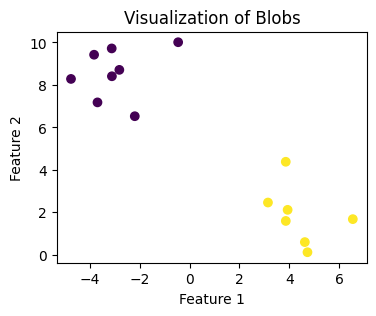

In [ ]:
plt.figure(figsize=(4, 3))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', marker='o')
plt.title('Visualization of Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

You can see there basically 2 gaussian hats (~ 15 samples from 2 gaussian hats).

<a href="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.geeksforgeeks.org%2Fwp-content%2Fcdn-uploads%2F20190523171258%2Foverfitting_2.png&f=1&nofb=1&ipt=042ce96dbef98d7aa8ba54ca1e90ce3d0132347982c54dd1ca7580e6da8411e3&ipo=images"><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.geeksforgeeks.org%2Fwp-content%2Fcdn-uploads%2F20190523171258%2Foverfitting_2.png&f=1&nofb=1&ipt=042ce96dbef98d7aa8ba54ca1e90ce3d0132347982c54dd1ca7580e6da8411e3&ipo=images" alt="banner" width="600" align="right"></a>
 - function that splits our data (`X, y`) into training dataset and testing dataset.
This is needed to evaluate how successfull are the predictions of our model on those data that it hasn't seen. (The ability to extrapolate is important.)

Also this helps to avoid overfitting: if model learns to much from our data, it starts to remember not only the main pattern, but also things like random noise

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True) #takes data and splits it into training and testing data set
#you can add shuffle to avoid problems with ordered datasets
#20% test, and 80% training
#random state?

In [ ]:
print(f"size of x = {x.shape}")
print(f"size of X_train = {X_train.shape}") #80% training = 12/15
print(f"size of X_test = {X_test.shape}") #20% test =3/15
print(f"size of y = {y.shape}")
print(f"size of y_train = {y_train.shape}")
print(f"size of y_test = {y_test.shape}")

size of x = (15, 2)
size of X_train = (12, 2)
size of X_test = (3, 2)
size of y = (15,)
size of y_train = (12,)
size of y_test = (3,)


In [ ]:
# we don't want to mess with different variables under same name, so:
del(x, y, X_train, X_test, y_train, y_test) #remove these variables so we don't have problem later on

### Perceptron - an "atom" of neural networks


<a href="https://media.geeksforgeeks.org/wp-content/uploads/20230426162726/Perceptron-1.webp"><img src="https://media.geeksforgeeks.org/wp-content/uploads/20230426162726/Perceptron-1.webp" alt="banner" width="500" align="right"></a>

recommended reading:
 - simplest tutorial on [geeksforgeeks](https://www.geeksforgeeks.org/what-is-perceptron-the-simplest-artificial-neural-network/?ref=header_search)
 - more details and history on [wikipedia](https://en.wikipedia.org/wiki/Perceptron)

**Perceptron** is the simplest neural network consisting of single node. One of it's benefits is simple implementation and relatively high accuracy, but it can be used only when these assumptions are made:
1.   data are *linearly separable* e.g. draw one line to separate classes (blob example above)
2.   classification problem is *binary* so only two classes allowed

Perceptron *finds one hyperplane* (for example in 2D - line) that separates the data. Finds the line to split the observations into two classes.

Initialize a line or estimate, but it doesn't really matter a lot. You will go through your data line by line to adjust the line with your training data.

**Decision rule:**
to check whether datapoint $x$ lies on positive or negative side of the hyperplane.

 - mathematically hyperplane is a linear function defined in vector space:
\begin{aligned}
f(x) = <w|x> + b = w^{t} x + b = \sum_j w_j \cdot x_j + b = \sum_j w_j \cdot x_j + b \cdot 1,
\end{aligned}

where $x$ is positional vector, $w$ and $b$ are coeficients (also vectors) defining concrete hyperplane out of all existing hyperplanes in defined space. You get a type of slope and intercept.


 - to determine "on which side" of hyperplane is point $x$ we use activation function - here Heaviside (step) function defined as
\begin{align}
        h(x) = \left\{
        \begin{array}{cl}
        1 & \text{if } x \ge 0 \\
        0 & \text{otherwise}
        \end{array}
        \right.
    \end{align}


* let's note $\hat{y}(x) := h\left( w^tx + b \right)$ (**approximation/prediction**) This formula returns either 1 or 0 depending on which side of hyperplane is located point $x$. Previous formula multiplied by Heavyside step function.

**Update rule:** now we have our result $\hat{y}$ (computed above) and also real value (part of train data). We want to check whether our result is equal to real value or not. In second case we want to change parameters $w$ and $b$ (rotate/shift the hyperplane) in preferred way. In other words - if our prediction was wrong, we want to update our parameters describing the hyperplane.

\begin{aligned}
w = w + \alpha (<y|x> - <\hat{y}|x>) = w + \alpha (y - \hat{y})x,
\end{aligned}

where $\alpha \in [0,1]$ is *learning rate*. It is good to plot the data to check if your learning rate is OK.

<a href="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Perceptron_example.svg/900px-Perceptron_example.svg.png"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Perceptron_example.svg/900px-Perceptron_example.svg.png" alt="banner" width="370" align="right"></a>

*Technically*, update looks like this:
 - we try to make a prediction
 - we compute the loss (since we have the real value of `y` and predicted one, we can compute the difference)
 - we update weights and bias ($w$ and $b$) accordingly

 Adjust line a little bit everytime an extra sample is added.

Perceptron implementation:

In [ ]:
class OurPerceptron: #object
    def __init__(self, num_inputs, learning_rate=0.01): #to initialize your object
        # num_inputs= number of inputs
        # Initialize weights and learning rate
        self.weights = np.random.rand(num_inputs + 1)  # +1 for bias (b), self.weights means weights variable is part of the object OurPerceptron
        self.learning_rate = learning_rate  # controls how much we adjust the weights with each step of training

    def linear(self, inputs):
        # Compute the linear combination of inputs and weights
        return np.dot(inputs, self.weights[1:]) + self.weights[0] #substitute x in a*x+b where a and b are weights

    def Heaviside_step_fn(self, z):
        # Heaviside step function
        return np.heaviside(z, 1)

    def predict(self, inputs):
        # Predict function using Heaviside step function
        Z = self.linear(inputs)
        return self.Heaviside_step_fn(Z)

    def loss(self, prediction, target):
        # Calculate loss
        return target - prediction #compare your real value and prediction
        #prediction not defined yet?

    def train(self, inputs, target): #inputs=x, target=y
        # Update weights based on prediction error
        prediction = self.predict(inputs)
        error = self.loss(prediction, target)
        #move lines based on error, run based on every datapoint
        self.weights[1:] = self.weights[1:] + self.learning_rate * error * inputs
        self.weights[0] = self.weights[0] + self.learning_rate * error

    def fit(self, X, y, num_epochs):
        # Fit the model to the data for a number of epochs
        # 'num_epochs' = number of times we go through the entire training dataset (re-use correlation from epoch 1 as starting point for epoch 2?)
        for epoch in range(num_epochs):
            for inputs, target in zip(X, y):
                self.train(inputs, target)

Let's test it:

In [ ]:
# Example usage with very trivial data

# Training data:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) #num_inputs=2 because we have two features, 2D
y = np.array([0, 1, 1, 1])

# Initialize and train perceptron
perceptron = OurPerceptron(num_inputs=2, learning_rate=0.1)
perceptron.fit(X, y, num_epochs=10) #call built in function of perceptron (only exists in perceptron)

# Test perceptron
print(perceptron.predict([0, 0]))  # Output: 0
print(perceptron.predict([0, 1]))  # Output: 1
print(perceptron.predict([1, 0]))  # Output: 1
print(perceptron.predict([1, 1]))  # Output: 1
#predicts same output as in training data!
#not super interesting yet because you only give same data points as training data (test for other data?)

0.0
1.0
1.0
1.0


Seems it works!🎉 Let's try something more interesting:

Accuracy: 1.0


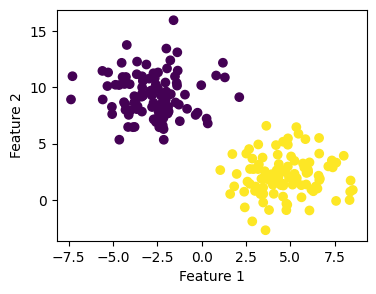

In [ ]:
# Import the necessary library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.8, random_state=42) #difference between features and centers?

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Initialize the Perceptron with the appropriate number of inputs
perceptron = OurPerceptron(num_inputs = X_train.shape[1])

# Train the Perceptron on the training data
perceptron.fit(X_train, y_train, num_epochs=1000)

# Prediction of testing data!
# More interesting because model hasn't seen this data yet <> training data (will always give exact same output? or some type of estimate?)
y_pred_our = perceptron.predict(X_test)

# Test the accuracy of the trained Perceptron on the testing data: compare test data with real output
accuracy = np.mean(y_pred_our == y_test) #I think this will also give an array with proportion of right answers
#python can compare y_pred_our to y_test and will automatically convert to int, no problem with comparison like lecture of yesterday with booleans etc.
#example yesterday: read string as True because it has some text
#previous code was !=, this will give error percentage
print("Accuracy:", accuracy)

# Plot the dataset
plt.figure(figsize=(4,3))
#makes a scatter plot of test data: x and y and color is based on prediction!
#colors divided in two classes
#2 features so two axis?
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_our)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
y_pred_our #zeros and ones will determine the color

array([1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.])

Too technical? Don't worry, there's a built-in functionality in scikit-learn library:

In [ ]:
# we have just the same X, y, and then also same X_train, X_test, y_train, y_test

In [ ]:
#Perceptron from Python itself, perceptron was our self-defined one
from sklearn.linear_model import Perceptron

# Create a perceptron classifier - instance of object, part of library
clf = Perceptron(eta0=0.1, max_iter=1000)  # eta0 is learning rate
#max_iter is like the epoch

# Train the perceptron classifier
clf.fit(X_train, y_train)

# Predict on the test data
y_pred_sklearn = clf.predict(X_test)

# Calculate accuracy - why lower accuracy?
# Calculates proportion accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_sklearn)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [ ]:
y_pred_our - y_pred_sklearn #just two differences

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

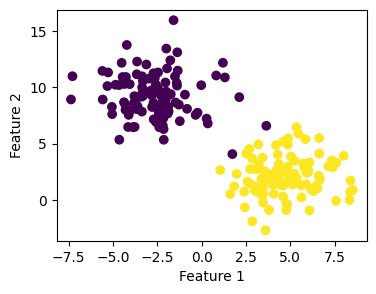

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sklearn)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

let's see both graphs together:

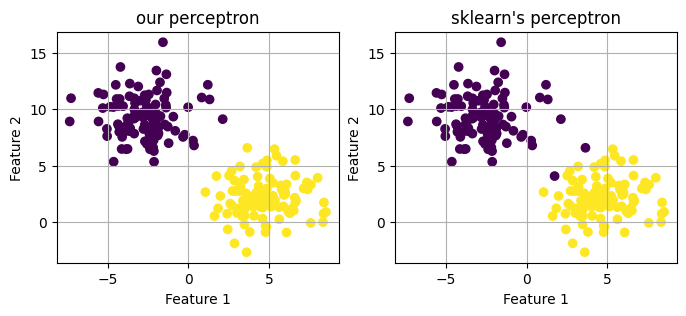

In [ ]:
plt.figure(figsize=(8,3), dpi=100)
plt.subplot(1,2,1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_our)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.title("our perceptron")
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sklearn)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.title("sklearn's perceptron")
plt.show()
#Probably there is some differnce in internal calculation

The biggest difference is execution time 😉

In [ ]:
perceptron.weights

array([ 0.92494943,  0.22669606, -0.24471147])

Let's draw a line:

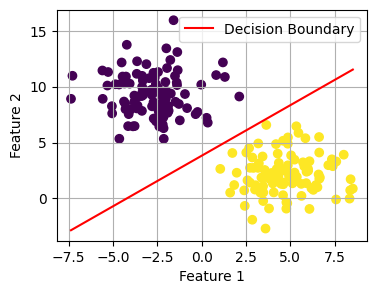

In [ ]:
# Extract weights: necessary to calculate intercept and slope
bias = perceptron.weights[0]
w1 = perceptron.weights[1]
w2 = perceptron.weights[2]

# Compute slope and intercept
slope = -w1 / w2
intercept = -bias / w2

# Generate x values for plotting
x_vals = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]), 100)
y_vals = slope * x_vals + intercept

# Plot the scatter plot with decision boundary
plt.figure(figsize=(4,3))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_our)
plt.plot(x_vals, y_vals, '-r', label='Decision Boundary')  # '-r' for red line
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


Very useful&important way to check how well did you classify is **confusion matrix** (which can be either represented as a matrix or visualised as a figure).

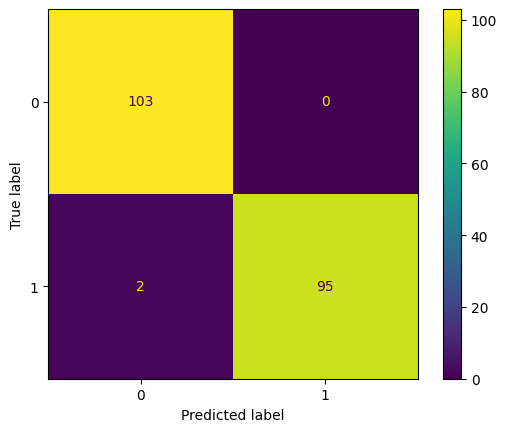

In [ ]:
#look at where your algorithm messed up
from sklearn.metrics import confusion_matrix
from sklearn import metrics

conf_matrix = confusion_matrix(y_test, y_pred_sklearn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

cm_display.plot()
plt.show()

#yellow is right answer, purple is wrong answer
#why more than 100? not percentage?

### Support Vector Machine (SVM)
 = algorithm of supervised ML, usually used for classification task
 [https://scikit-learn.org/stable/modules/svm.html#svm-classification](https://scikit-learn.org/stable/modules/svm.html#svm-classification)

 **The core idea:** to find a hyperplane that best divides a dataset into classes.

 A hyperplane is a decision boundary that separates different classes in the feature space. In two dimensions, this hyperplane is a line, but in higher dimensions, it can be a plane or a hyperplane.

A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks.
Intuitively, a good separation is achieved by the hyper-plane that **has the largest distance to the nearest training data points** of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.
Looks at the points that are closest to each other and tries to maximize the distance of the band between them.

The figure below shows the decision function for a linearly separable problem, with three samples on the margin boundaries, called “support vectors”:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_001.png" alt="banner" width="450">

In [47]:
#Not build it ourself, but use built in function
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate random data using make_blobs
x, y = make_blobs(n_samples=300, centers=2, cluster_std=1.8, random_state=42) #not used for real data

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #still used for real data

# Create and fit SVM classifier - quite similar to perceptron
model = SVC(kernel='linear')   # {'precomputed', 'linear', 'poly', 'rbf', 'sigmoid'}
model.fit(x_train, y_train)
#perceptron can't make special curves, this SVM can
#for poly you can also specify the order of it (first order = linear)

# Evaluate the model with training and testing data
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9958333333333333
Testing Accuracy: 0.9833333333333333


<ipython-input-48-c90aaa17da5e>:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.RdBu, edgecolors='k', marker='x', label="Testing data") #testing data


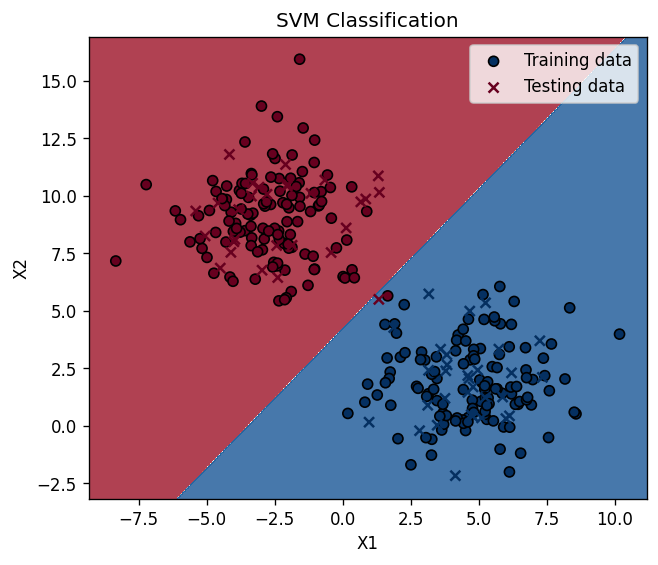

In [48]:
# Plot decision boundary (works only for 2D features)
plt.figure(figsize=(6,5), dpi=120)
if x_train.shape[1] == 2:
    # Complicated plotting because meshgrid gives background color that predicts sector size
    # Create a meshgrid to plot decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #calculates for every x1,x2 the corresponding z to plot the sectors

    # Plot decision boundary
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8) #plotting the sectors

# Plot the data points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k', label="Training data") #training data
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.RdBu, edgecolors='k', marker='x', label="Testing data") #testing data
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classification')
plt.legend()
plt.show()

#lines in plot are not calculated, it's just the overlap of the different sectors

💡 Perceptron classifier can be used only for *binary* classification. But it's not the case for SVM! Try to modify number of groups (`centers` in `make_blobs`) and see how the image above changes.
Try switching back and forth between types of models (linear, poly,...) to find the simplest model that fits your data well.

### k-means clustering

 = algorithm for *clustering* data , i.e. splitting the data into groups based on their similarity. The number of clusters (groups) of given (either by the formulation of the task, or by your expert knowledge, or by computational limits, ...).
 Unsupervised machine learning.

**k-means algorithm**:
1) choose a number of clusters, $k$.
2) randomly select $k$ points rom your dataset as initial centroids (*centroid* = a point situated in a center of $k$-th cluster).
3) assign each datapoint from your data to the nearest centroid. This is how you get $k$ clusters.
4) **update step**: find a new centroid of each cluster by calculating the mean value of all data points assigned to this cluster
5) repeat from step 3) until either centroids no longer change (convergence is reached) or a maximum number of iterations is reached (we don't want our algorithms to run forever)

Define some centroids and assign each data point to a centroid. Now find a new center (mean) per cluster and repeat. Repeat until you find a conversion point or a certain number of iterations has been reached.

In [50]:
#no manual defining of the code, but just import
#you could do it with some while loops etc. (not too calculated)
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=100, centers=2, cluster_std=1.3, random_state=42) #we have an underscore because make_blobs generates X and Y
#the underscore is there so we don't store the Y
#unsupervised learning so we don't want to check the correct answer
#in real life situations you might or might not have Y, you don't use them for the model

🚨 Notice: it's unsupervised learning! We don't know "the answers", that's why we don't need `y`.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


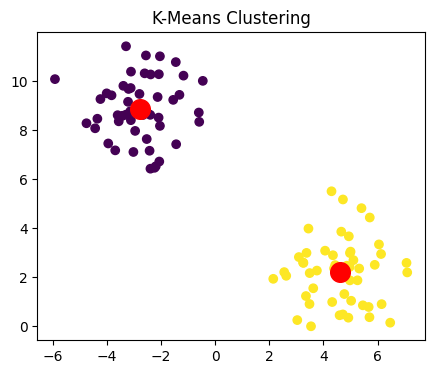

In [55]:
# Model training
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Plotting
plt.figure(figsize=(5,4), dpi=100) # figure is initialised
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_) # plot the datapoints (on x-axis 0th feature, on y-axis 1st feature, different colours acc. to kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')  # plot centroids
plt.title('K-Means Clustering')
plt.show()
#red dots represent the centroids
#you could change the amount of clusters to test if it fits the data well
#difficult for example when the stdv is greater, you could maybe just see 1 cluster or 3 clusters

In [56]:
kmeans.labels_ #labels calculated for all categories 0,1,2,3,...

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

## Irises - one more time:

Let's try to look again on a simple dataset - iris dataset.

Our task now will be:
1) understand its properties (using different techniques we have already learned)
2) try to build up a classifier, which can predict what class iris belongs to based on values of sepal/petal length/width

Practical use-case: you pick a flower, you measure it -> you want a reliable software that will classify it.

In [59]:
df_iris = sns.load_dataset('iris')
#3 types of species
df_iris.sample(8)

,sepal_length,sepal_width,petal_length,petal_width,species
129,7.2,3.0,5.8,1.6,virginica
8,4.4,2.9,1.4,0.2,setosa
102,7.1,3.0,5.9,2.1,virginica
79,5.7,2.6,3.5,1.0,versicolor
14,5.8,4.0,1.2,0.2,setosa
45,4.8,3.0,1.4,0.3,setosa
128,6.4,2.8,5.6,2.1,virginica
88,5.6,3.0,4.1,1.3,versicolor


In [63]:
df_iris.describe() #wouldn't include species because it's not a number
df_iris.describe(include='all')
#top is most represented (by default now because frequencies are equal), frequency = 50, unique categories, no mathematical calculations


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Dataset contains 150 observations of iris flowers. The parameters measured were lengths and widths, the "response" variable was the only categorical one present in this dataset: the name of species of the observed flower (3 possible values).

In [65]:
df_iris["species"] = df_iris["species"].astype("category") #now interpret as categorical values (instead of string)

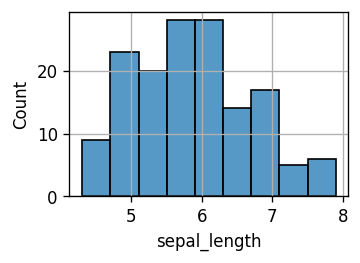

In [67]:
#histogram
plt.figure(figsize=(3,2), dpi=120)
sns.histplot(data=df_iris['sepal_length'])
plt.grid()
plt.show()

📈 3d picture of the dataset --> separate script
not in Jupyter Notebook or Google Colab
3D model where you can rotate the plot

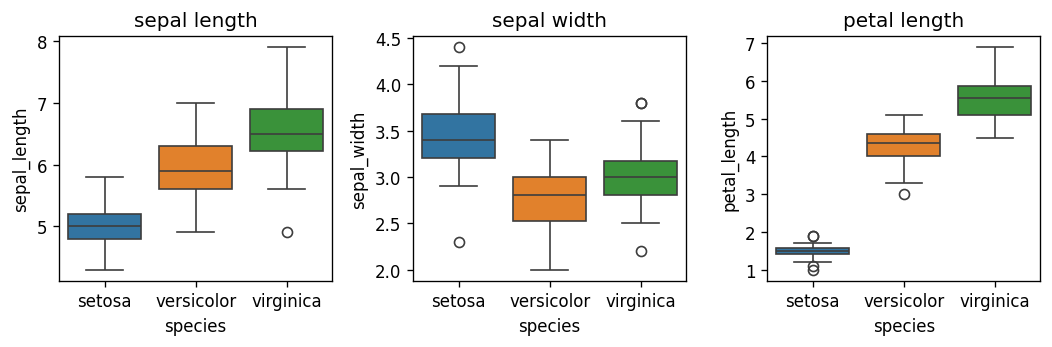

In [69]:
#seaborn boxplot graphs
#good to understand some more of the data, and know what to implement in ML
#information: ah, I can separate the three classes in some way
plt.figure(figsize=(9,3), dpi=120)
plt.subplot(1,3,1)
sns.boxplot(x='species', y='sepal_length', data=df_iris, hue='species')
plt.title("sepal length")
plt.subplot(1,3,2)
sns.boxplot(x='species', y='sepal_width', data=df_iris, hue='species')
plt.title("sepal width")
plt.subplot(1,3,3)
sns.boxplot(x='species', y='petal_length', data=df_iris, hue='species')
plt.title("petal length")
plt.tight_layout()
plt.show()

Pairplot makes the first impression of dataset for us:

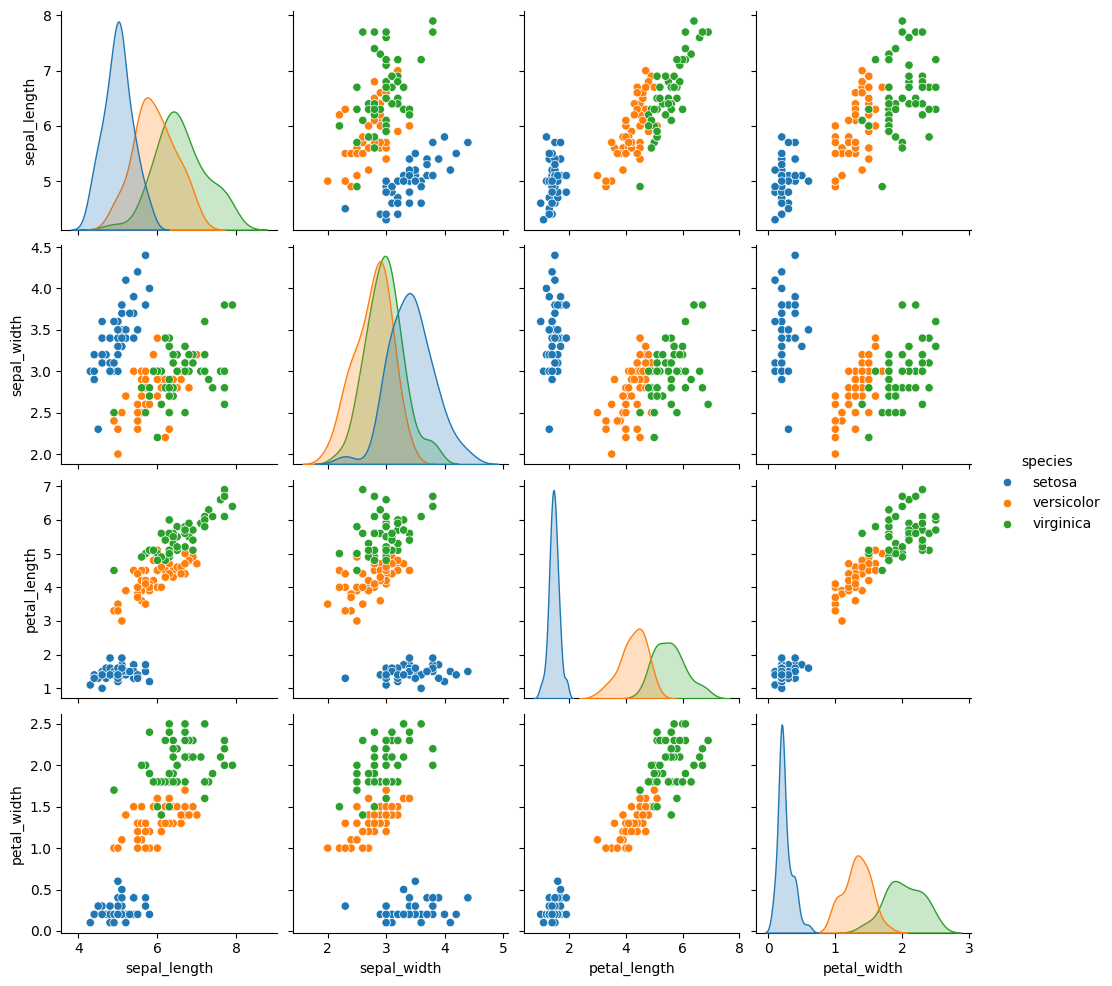

In [70]:
sns.pairplot(data=df_iris, hue='species')
plt.show()
#look to see which variables are useful for separating the data point

Let's also visualise a statistical relationship:

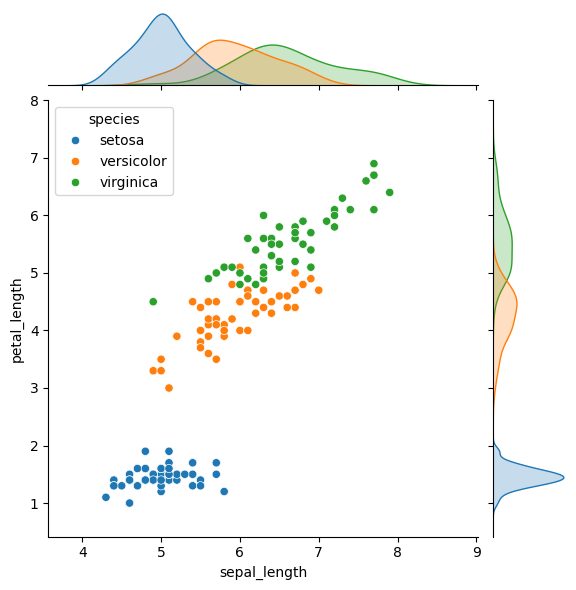

In [71]:
sns.jointplot(x="sepal_length", y="petal_length", data=df_iris, hue = 'species')
#shows how much information we can get from certain points

We can suspect that classes can be seperated. Let's use SVM (because responses are known):

In [74]:
print(df_iris['species']) #strings
df_iris['species'] = pd.factorize(df_iris['species'])[0] + 1 #turns categories into a number 0,1,2
print(df_iris['species']) #numbers

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64


In [75]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into features (X) and target (y)
X = df_iris.drop('species', axis=1) #in this case all the variables are included, but sometimes it's good to let some out to get a better accuracy (e.g. width in this case)
y = df_iris['species']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LinearSVC classifier
clf = LinearSVC()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [77]:
y #check output categories

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64

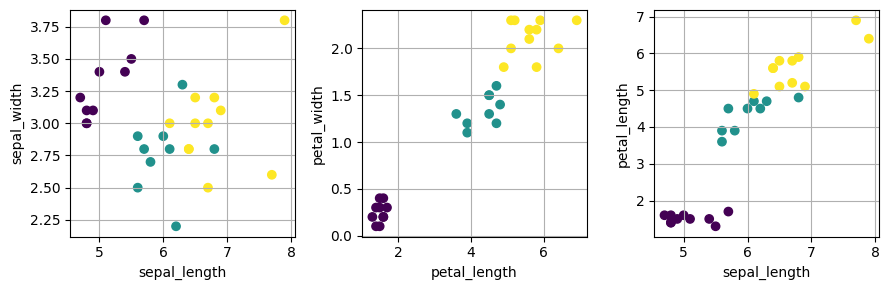

In [78]:
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_pred)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.grid()
plt.subplot(1,3,2)
plt.scatter(X_test['petal_length'], X_test['petal_width'], c=y_pred)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.grid()
plt.subplot(1,3,3)
plt.scatter(X_test['sepal_length'], X_test['petal_length'], c=y_pred)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.grid()
plt.tight_layout()
plt.show()
#look per 2 variables how the variables were splitted into groups

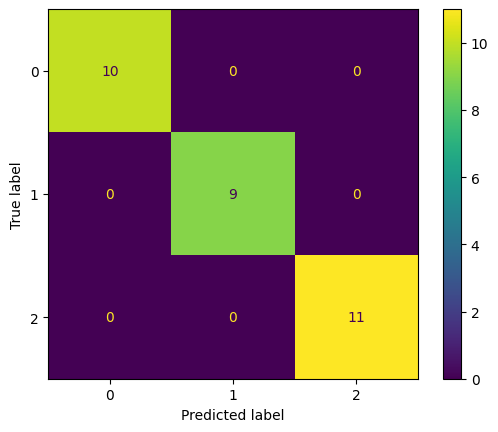

In [79]:
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

cm_display.plot()
plt.show()
#3x3 because we have 3 categories

Sometimes it's better to have a 'curvy' decision border. For that purpose, you can use several modifications of SVM:

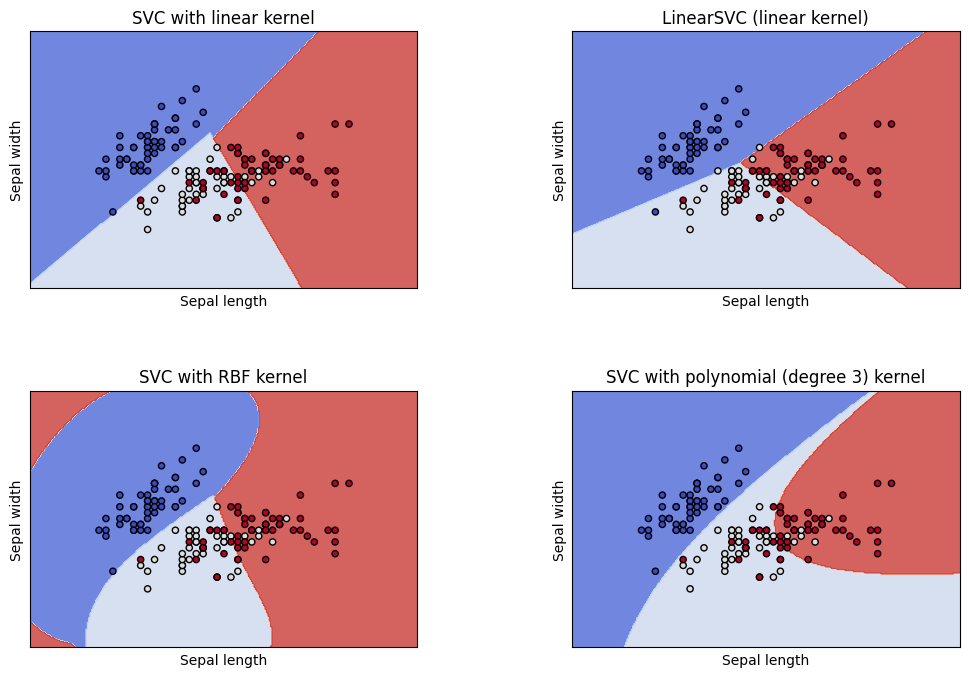

In [80]:
from sklearn import svm, datasets

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features.
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize=(12,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
#picture highly depends on which type of model you choose
#intrapolating is easier than extrapolating (always? top left is clearly blue, no? or maybe it is a new class?)

## Concluding remarks and advices
 - remember [Occam's razor]() (aka principle of parsimony, aka [KISS principle](https://en.wikipedia.org/wiki/KISS_principle)):

        > "The simplest explanation is usually the best one."
 -

## Additional sources (where to seek for information):
 - Intro to ML made by Google (free to use) [here](https://developers.google.com/machine-learning/intro-to-ml)
 - tutorial on ML on w3schools: [here](https://www.w3schools.com/python/python_ml_getting_started.asp)
 - lectures from Snaford University [here](https://ee104.stanford.edu/lectures/overview.pdf)

<div style="font-style: italic; font-size: 14px;">
    <p>This material was prepared by Department of Information Engineering (<a href="https://www.pef.czu.cz/en">PEF ČZU</a>) exclusively for purposes of ELLS summer school "Practical Introduction into Programming with Python". Any distribution or reproduction of this material, in whole or in part, without prior written consent of the authors is prohibited.</p>
    <p>This material is shared under the <b>Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International Public License</b>, <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">link</a>.</p>
</div>


`
#Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
`